The purpose of this report is to identify the most popular taxi dropoff locations in Chicago and identify Zuber's biggest competitors in order to find patterns in the available information that may give a competitive edge. We will also determine the impact of weather on trip times. 

In [1]:
import pandas as pd
from scipy import stats as st

In [2]:
rides = pd.read_csv('/datasets/project_sql_result_01.csv')
dropoffs = pd.read_csv('/datasets/project_sql_result_04.csv')

In [3]:
rides.head()

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


In [4]:
rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [5]:
dropoffs.head()

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000


In [6]:
dropoffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


In [7]:
dropoffs.sort_values(by=['average_trips'], ascending = False, inplace=True)

In [8]:
dropoffs.head(10)

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


The top 10 neighborhoods by number of dropoffs are as listed above.

<AxesSubplot:>

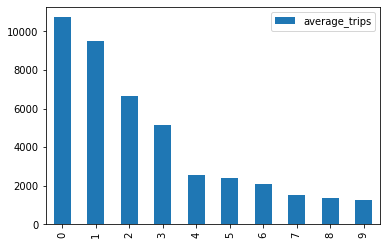

In [9]:
dropoffs.head(10).plot(kind = 'bar')

An overwhelmingly large portion of users are traveling to Loop or River North. These two destinations account for more trips than the next 5 most traveled to destinations.

In [10]:
rides.sort_values(by=['trips_amount'], ascending=False, inplace=True)

In [11]:
rides.head(30)

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
5,Chicago Carriage Cab Corp,9181
6,City Service,8448
7,Sun Taxi,7701
8,Star North Management LLC,7455
9,Blue Ribbon Taxi Association Inc.,5953


<AxesSubplot:>

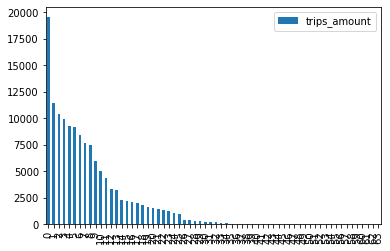

In [12]:
rides.plot(kind = 'bar')

This graph shows that Flash Cab has the most trips by far. They have 71% more rides than the 2nd most used taxi service, Taxi Affiliation Services. After this dropoff, the subsequent taxi services decrease gradually in dropoffs.

In [13]:
weather = pd.read_csv('/datasets/project_sql_result_07.csv')

In [14]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


In [15]:
weather['start_ts'] = pd.to_datetime(weather['start_ts'], format= '%Y-%m-%d %H:%M:%S')

In [16]:
weather['day'] = pd.to_datetime(weather.start_ts).dt.dayofweek

In [17]:
weather

,start_ts,weather_conditions,duration_seconds,day
0,2017-11-25 16:00:00,Good,2410.0,5
1,2017-11-25 14:00:00,Good,1920.0,5
2,2017-11-25 12:00:00,Good,1543.0,5
3,2017-11-04 10:00:00,Good,2512.0,5
4,2017-11-11 07:00:00,Good,1440.0,5
...,...,...,...,...
1063,2017-11-25 11:00:00,Good,0.0,5
1064,2017-11-11 10:00:00,Good,1318.0,5
1065,2017-11-11 13:00:00,Good,2100.0,5
1066,2017-11-11 08:00:00,Good,1380.0,5


In [18]:
weather_good = weather.query('weather_conditions == "Good"')
weather_good_sat = weather_good.query('day == 5')
weather_good_sat

,start_ts,weather_conditions,duration_seconds,day
0,2017-11-25 16:00:00,Good,2410.0,5
1,2017-11-25 14:00:00,Good,1920.0,5
2,2017-11-25 12:00:00,Good,1543.0,5
3,2017-11-04 10:00:00,Good,2512.0,5
4,2017-11-11 07:00:00,Good,1440.0,5
...,...,...,...,...
1062,2017-11-11 06:00:00,Good,1500.0,5
1063,2017-11-25 11:00:00,Good,0.0,5
1064,2017-11-11 10:00:00,Good,1318.0,5
1065,2017-11-11 13:00:00,Good,2100.0,5


In [19]:
weather_bad = weather.query('weather_conditions == "Bad"')
weather_bad_sat = weather_bad.query('day == 5')
weather_bad_sat

,start_ts,weather_conditions,duration_seconds,day
6,2017-11-04 16:00:00,Bad,2969.0,5
30,2017-11-18 12:00:00,Bad,1980.0,5
34,2017-11-04 17:00:00,Bad,2460.0,5
51,2017-11-04 16:00:00,Bad,2760.0,5
52,2017-11-18 12:00:00,Bad,2460.0,5
...,...,...,...,...
1031,2017-11-18 12:00:00,Bad,2560.0,5
1032,2017-11-18 10:00:00,Bad,1908.0,5
1053,2017-11-18 12:00:00,Bad,2400.0,5
1061,2017-11-18 16:00:00,Bad,2186.0,5


Null hypothesis = average duration of rides from the Loop to OHare International Airport does not change on rainy Saturdays.

Alternative hypothesis =  average duration of rides from the Loop to OHare International Airport changes on rainy Saturdays.

In [20]:
sample_good = weather_good_sat['duration_seconds']
sample_bad = weather_bad_sat['duration_seconds']

alpha = 0.05
results = st.ttest_ind(sample_good, sample_bad)

print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

p-value:  6.517970327099473e-12
We reject the null hypothesis


The null and alternative hypotheses were determined by usual convention. The null hypothesis indicated that both sets of values are similar while the alternative hypothesis showed that both sets of data are different.

This hypothesis was tested by splitting the table that was created in the last query into two: one for good weather and the other for bad weather. The ride durations for each data set were then compared against each other. 

The result was overwhelmingly in favor of rejecting the null hypothesis. This indicates that there is a significant difference in the average trip time from Loop to OHare International Airport on rainy Saturdays.

Conclusion

Our biggest competitor is Flash Cab. Taxi Afilliation Services, Medallion Leasing, and Yellow Cab also complete a significant number of trips. The areas that Zuber should keep the most cars are Loop, River North, Streeterville, and West Loop. 

Additionally, trip times were analyzed and the length of trips on rainy Saturdays are considerably longer than on Saturdays with good weather. This indicates that Zuber should deploy additional drivers on rainy Saturdays in order to offset the longer trip time.